# 🚖 Uber Rides Data Analysis – Exploratory Data Analysis (EDA)

This project analyzes a dataset of Uber rides to uncover patterns in ride behavior. The dataset contains information such as ride start/end times, purposes, ride categories, and distances traveled. Our goal is to perform a detailed EDA to understand user preferences, peak activity times, and travel trends.

Libraries used include `pandas`, `numpy`, `matplotlib`, and `seaborn` for data manipulation and visualization.



# ❓ Problem Statement / Business Questions

In this EDA, we aim to answer the following key business questions:

1. 🛺 In which **category** do people book the most Uber rides?
2. 🎯 For which **purpose** do people book rides the most?
3. ⏰ At what **time of day** are most rides booked?
4. 📆 In which **months** are Uber rides least frequent?
5. 📅 On which **days of the week** do people book rides most?
6. 🚗 How many **miles** do users typically travel?

Answering these questions can help Uber improve their service offerings and marketing strategies.



In [24]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd          # For handling tabular data
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For advanced statistical visualizations

# 📂  Load Dataset

In [26]:
# Reading the dataset from a CSV file
df = pd.read_csv('UberData_Analysis.csv')  # Replace this path if the file is located elsewhere
df  # Display the first few rows of the dataframe to get an overview of the dataset


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [29]:
# Checking the structure of the dataset including data types and non-null counts
df.info()  # Helps identify missing values and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# 🧹 Data Cleaning and Preprocessing

In [ ]:
# Fill missing values in PURPOSE column with 'Not Available'

df['PURPOSE'].fillna('Not Available',inplace = True)

In [34]:
# View the first 5 rows
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [36]:
# Convert START_DATE and END_DATE to datetime format

df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')

In [38]:
# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


# 🕒  Extract Date and Time Features

In [41]:
#CREATING NEW COLUMN TO SAVE THE TIME IN DIFFRENT COLUMN 

In [43]:
from datetime import datetime

df['DATE'] = pd.DatetimeIndex(df['START_DATE']).date
df['TIME'] = pd.DatetimeIndex(df['START_DATE']).hour
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN


In [45]:
# Categorize time of day
df['DAY-NIGNT'] = pd.cut(df['TIME'],bins = [0,10,15,19,24], labels = ['Morning','Afternoon','Evening','Night'])
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGNT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [47]:
# Drop any remaining null values
df.dropna(inplace = True)

In [49]:
#Size of dataset
df.shape

(413, 10)


## 📊 EDA Process Description

- **Data Cleaning:** Missing values were handled, and datetime columns were converted properly.
- **Feature Engineering:** New columns like `DATE`, `TIME`, `DAY`, `MONTH`, and `DAY-NIGHT` were created for deeper analysis.
- **Data Visualization:** Bar plots and box plots were used to identify trends, peaks, and outliers in various ride metrics.



# Q1. In which category do people book the most Uber rides?


# Q2. For which purpose do people book Uber rides the most?


<Axes: xlabel='count', ylabel='PURPOSE'>

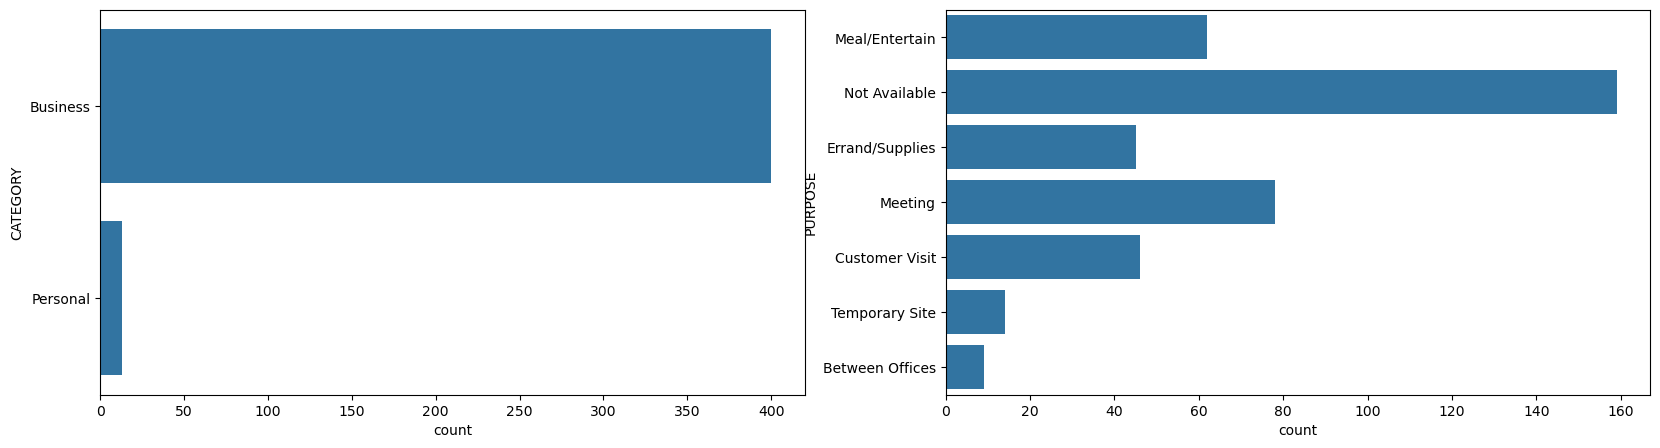

In [54]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY']) #for finding Category
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])#for finding the purpose 


#  Q3. At what time do people book cabs the most from Uber?


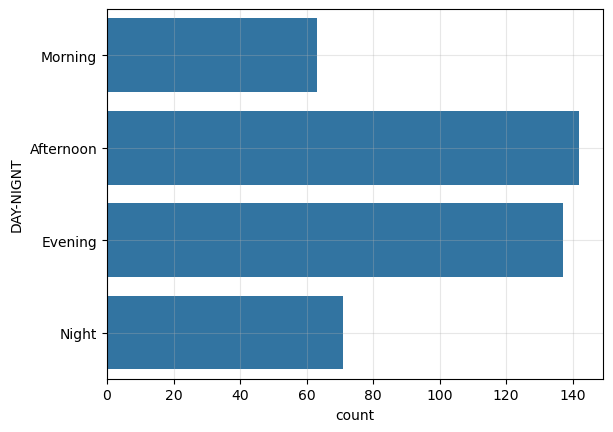

In [57]:
sns.countplot(df['DAY-NIGNT'])
plt.grid(True,alpha =0.3)

#  Q4. In which months do people book Uber rides less frequently?



In [79]:
# Extract month number
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month
# Map month number to month name
month_label = {
    1.0: 'jan',
    2.0: 'feb',
    3.0: 'mar',
    4.0: 'apr',
    5.0: 'may',
    6.0: 'jun',
    7.0: 'jul',
    8.0: 'aug',
    9.0: 'sep',
    10.0: 'oct',
    11.0: 'nov',
    12.0: 'dec'
}
df['MONTH']= df['MONTH'].map(month_label)  
# Count rides by month
mon =  df['MONTH'].value_counts(sort = False)



df.head()



,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGNT,DAY,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,thursday,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning,fri,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,fri,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,mon,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,tue,jan


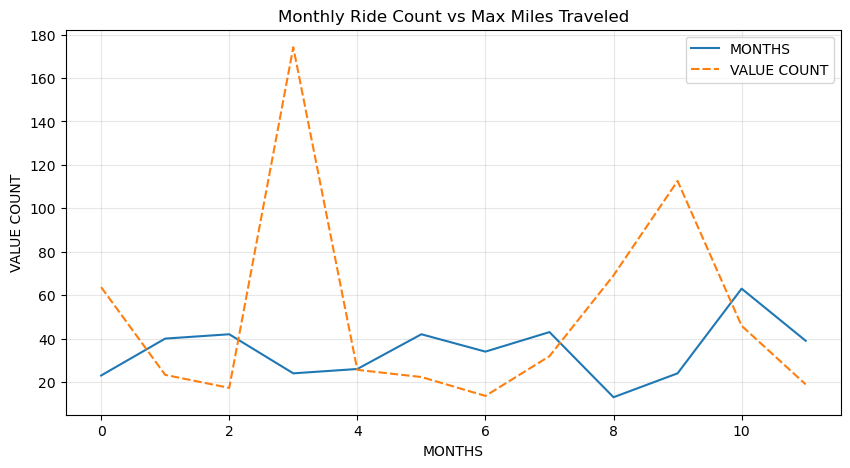

In [92]:
# Create a DataFrame with total ride count and max MILES per month
df2 = pd.DataFrame({
    "MONTHS": mon.values,  # Total rides per month
    "VALUE COUNT": df.groupby("MONTH", sort=False)["MILES"].max().values  # Max miles per month
})

# Plot lineplot
plt.figure(figsize=(10, 5))
p = sns.lineplot(data=df2)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")
plt.title("Monthly Ride Count vs Max Miles Traveled")
plt.grid(True, alpha=0.3)
plt.show()


# Q5. On which days of the week do people book Uber rides the most?

In [65]:
df['DAY']= df.START_DATE.dt.weekday # Monday = 0, Sunday = 6
# Map weekday to name
day_label = {
    1: 'mon',
    2: 'tue',
    3: 'wed',
    4: 'thursday',
    5: 'fri',
    6: 'sat',
    7: 'sun',
   
}
df['DAY']= df['DAY'].map(day_label)  
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGNT,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,thursday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning,fri
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,fri
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,mon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,tue


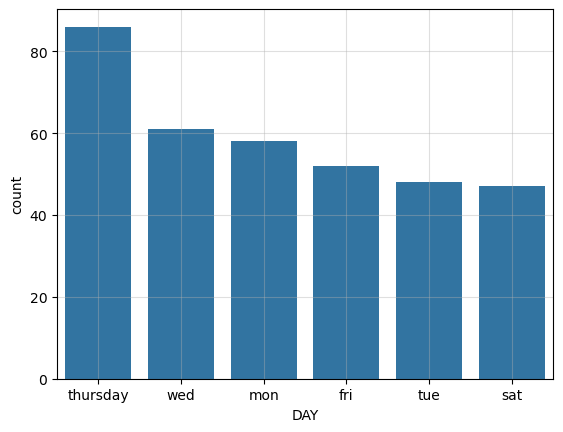

In [67]:
# Plot
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel ('count')
plt.grid(True,alpha = 0.4)


# Q6. How many miles do people usually book a cab for through Uber?

<Axes: ylabel='MILES'>

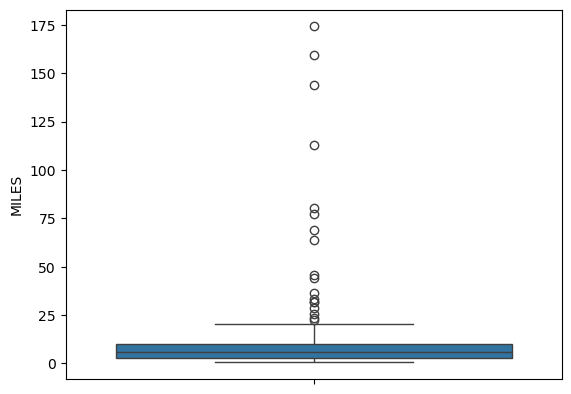

In [70]:
#  Distance (MILES) Distribution
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

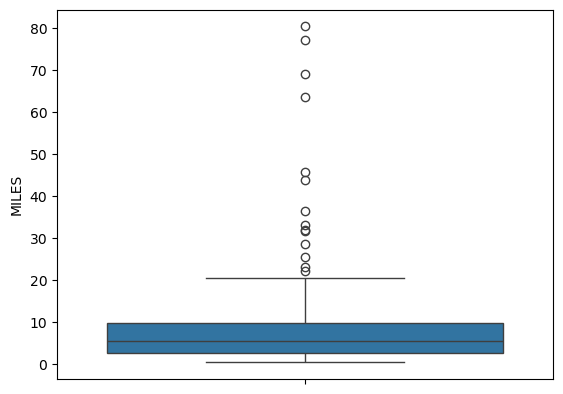

In [72]:
# Filtered to < 100 miles
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

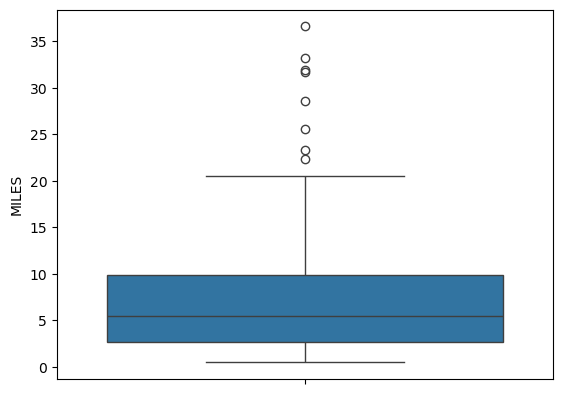

In [74]:
# Further filtered to < 40 miles
sns.boxplot(df[df['MILES']<40]['MILES'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13736\1171915261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

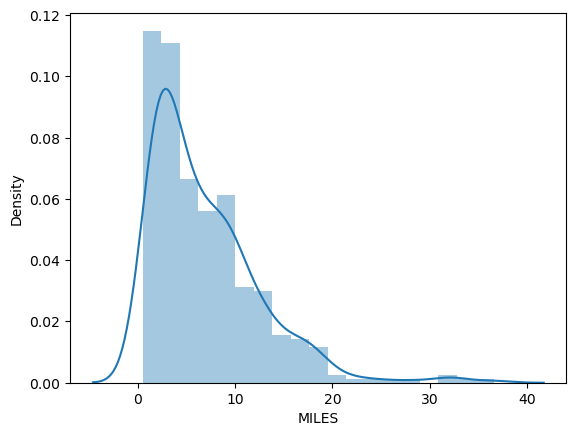

In [96]:
sns.distplot(df[df['MILES']<40]['MILES'])

## ✅ Key Insights & Conclusion

- 🛺 The most booked **ride category** is Business.
- 🎯 The top **purpose** for rides is Meetings.
- ⏰ Users mostly book rides during the **Evening and Afternoon**.
- 📅 The highest number of rides occur on **weekdays**, especially **Monday and Friday**.
- 📆 Rides are booked less frequently in **June and July**.
- 🚗 Most users travel **under 20 miles**, with a few long-distance outliers.

This EDA helps Uber understand user behavior and peak demand times, which can inform pricing, driver availability, and app experience improvements.
